Чигладзе Нодар .Домашка по классификации.Предсказать сердечный приступ.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [2]:
data = pd.read_csv("/content/heart.csv")
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


посмотрим имеет ли наш датасет пропуски в данных

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


пропусков нет да и все значения чсиленне нам очень повезло .
построим мартрицу корелляций чтобы понять какие значенияч влияют на предсказанеи нашей переменной .

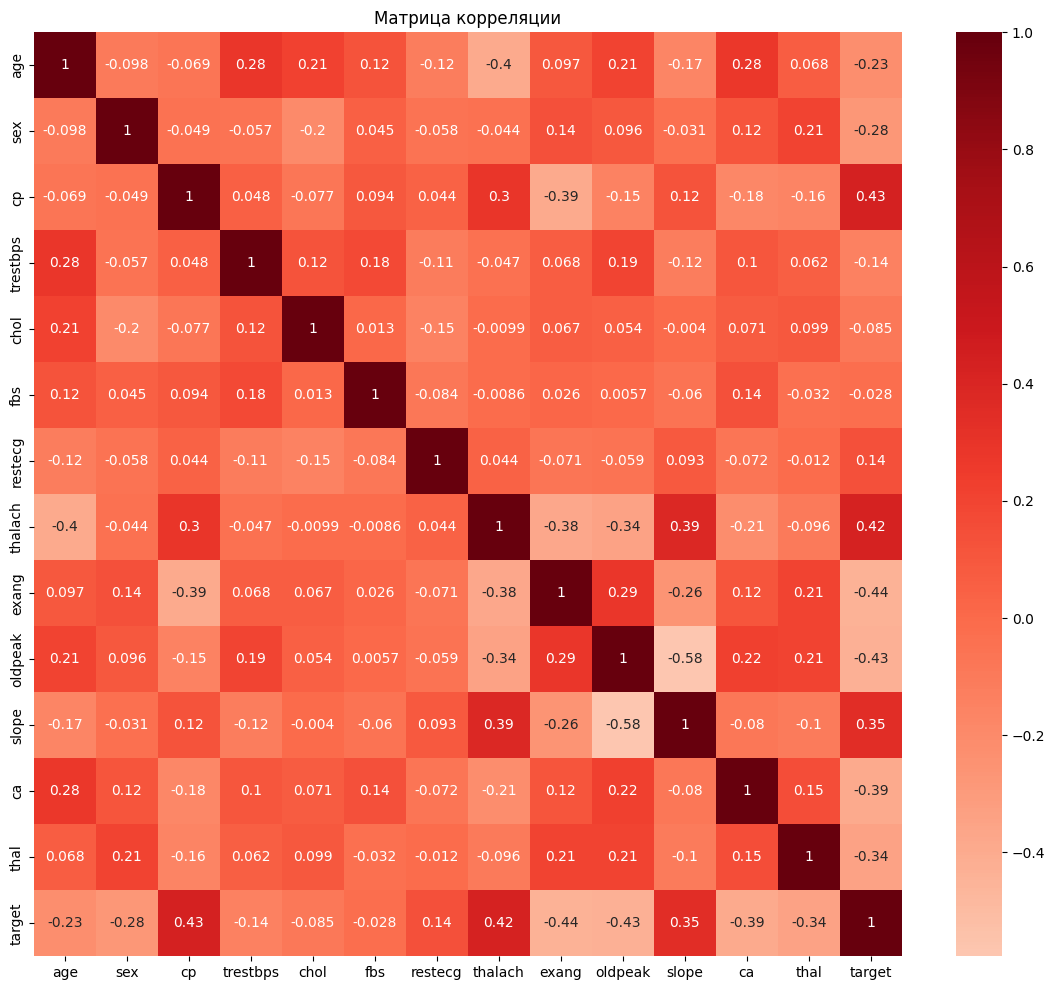

In [5]:
plt.figure(figsize=(14,12))
correlation = data.corr(numeric_only=True)
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, cmap='Reds', center=0, annot=True)
plt.title("Матрица корреляции")
plt.show()

In [6]:
X = pd.concat([data.loc[:, 'age':'trestbps' ], data.loc[:, 'restecg':'thal' ]], axis=1)
y = data['target']

создадим модель и обучим её и предиктим овтеты

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model = LogisticRegression()
model.fit(X_train, y_train)

answers_pred = model.predict(X_test)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


выводим коефиценты при признаке

In [16]:
model.coef_

array([[-9.75815637e-04, -1.15583250e+00,  9.00180276e-01,
        -1.24124663e-02,  2.11735900e-01,  2.79474001e-02,
        -3.48343969e-01, -4.68403572e-01,  7.20620784e-01,
        -9.05323532e-01, -1.01553597e+00]])

свободный коеф

In [17]:
model.intercept_

array([0.03378489])

теперь оценим нашу логистическую регрессию

In [18]:
accuracy_score(y_test, answers_pred)

0.8241758241758241

In [19]:
recall_score(y_test, answers_pred)

0.8913043478260869

In [20]:
precision_score(y_test, answers_pred)

0.7884615384615384

In [21]:
f1_score(y_test, answers_pred)

0.8367346938775511

In [28]:
data['target'].value_counts()


,count
target,
1,165
0,138


In [30]:
tn, fp, fn, tp = confusion_matrix(y_test, answers_pred).ravel()
print("TN:", tn)
print("FP:", fp)
print("FN:", fn)
print("TP:", tp)



TN: 34
FP: 11
FN: 5
TP: 41
